# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://github.com/vicenzocarlim/ebac_atividades/blob/dda92492401ca706ce8d46cd1255d3570f45bed9/demo01.csv).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [41]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Carregando a base de dados
df = pd.read_csv('https://raw.githubusercontent.com/vicenzocarlim/ebac_atividades/main/demo01.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [42]:
# Verificar as variáveis envolvidas no dataframe e seus respectivos tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

Note que as variáveis `posse_de_veiculo` e `posse_de_imovel` são variáveis binárias, mas estão registradas como *strings*. Tanto a posse de veículo quanto a posse de imóvel podem assumir valores "sim" (Y) ou "não" (N). Portanto, vamos transformar "Y" em 1 e "N" em 0.

In [43]:
df.loc[df['posse_de_veiculo'] == 'Y', 'posse_de_veiculo'] = 1
df.loc[df['posse_de_veiculo'] == 'N', 'posse_de_veiculo'] = 0
df.loc[df['posse_de_imovel'] == 'Y', 'posse_de_imovel'] = 1
df.loc[df['posse_de_imovel'] == 'N', 'posse_de_imovel'] = 0
# Alterar o tipo de dado para inteiro
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype('int64')
df['posse_de_imovel'] = df['posse_de_imovel'].astype('int64')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,1,1,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,0,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,0,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,1,1,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,1,0,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [44]:
df.dtypes

sexo                      object
posse_de_veiculo           int64
posse_de_imovel            int64
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [45]:
# Avaliar a existência de dados duplicados
print(df.shape)
print(df.drop_duplicates().shape)

(16650, 16)
(6770, 16)


Há muitos registros duplicados. Vamos eliminá-los do dataframe.

In [46]:
df.drop_duplicates(inplace = True)
df.shape

(6770, 16)

In [47]:
# Avaliar os dados faltantes
df.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

Não há dados faltantes.

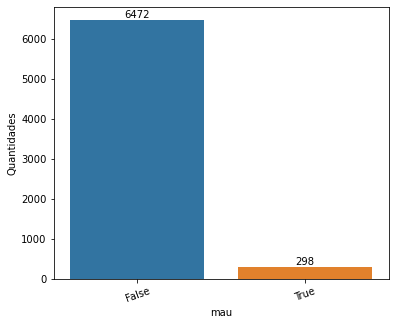

In [48]:
# Vamos construir um gráfico de colunas para a variável "mau"
fig, axes = plt.subplots(1, 1, figsize = (6, 5))
dist = sns.countplot(ax = axes, x = 'mau', data = df)

axes.set_ylabel('Quantidades') # mudar o título do eixo y
axes.set_xticklabels(axes.get_xticklabels(), rotation = 20, fontsize = 'small') # rotacionar os tiques
axes.set_xticklabels(axes.get_xticklabels(), rotation = 20, fontsize = 10) # diminuir o tamanho da fonte
# Adicionar rótulo em cada coluna
for p in axes.patches:
  height = p.get_height()
  axes.text(p.get_x()+p.get_width()/2., height + 50,
            '{:}'.format((height)),
            ha='center')
       
plt.subplots_adjust(wspace = 0, hspace = 0.4) # alterar o espaçamento entre os eixos
plt.show()

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [49]:
# 1. Construir um dataframe com os nomes de cada variável e o tipo de dados de cada variável
df_var = pd.DataFrame(df.dtypes, columns = ['Tipo de dado'])
df_var['Variável'] = df_var.index # Transformar o índice em uma coluna
df_var.index = list(range(0, len(df.dtypes))) # Alterar o índice para números
df_var = df_var[['Variável', 'Tipo de dado']] # Alterar a ordem das colunas
df_var

,Variável,Tipo de dado
0,sexo,object
1,posse_de_veiculo,int64
2,posse_de_imovel,int64
3,qtd_filhos,int64
4,tipo_renda,object
5,educacao,object
6,estado_civil,object
7,tipo_residencia,object
8,idade,float64
9,tempo_emprego,float64


In [50]:
# 2. Adicionar a coluna "qtd_categorias"
qtd_categorias = [] # lista vazia
for j in df.columns:
  n = len(df[j].value_counts()) # contar o número de categorias
  qtd_categorias.append(n)

df_var['qtd_categorias'] = qtd_categorias
df_var

,Variável,Tipo de dado,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,int64,2
2,posse_de_imovel,int64,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


Note que já criamos váriaveis *dummy* para as variáveis ```posse_de_veiculo``` e ```posse_de_imovel```. 

In [51]:
df['sexo'].value_counts()

F    4449
M    2321
Name: sexo, dtype: int64

In [52]:
df['tipo_renda'].value_counts()

Working                 3449
Commercial associate    1587
Pensioner               1191
State servant            542
Student                    1
Name: tipo_renda, dtype: int64

In [53]:
df['educacao'].value_counts()

Secondary / secondary special    4695
Higher education                 1743
Incomplete higher                 249
Lower secondary                    78
Academic degree                     5
Name: educacao, dtype: int64

In [54]:
df['estado_civil'].value_counts()

Married                 4654
Single / not married     862
Civil marriage           551
Separated                399
Widow                    304
Name: estado_civil, dtype: int64

In [55]:
df['tipo_residencia'].value_counts()

House / apartment      6078
With parents            289
Municipal apartment     233
Rented apartment         89
Office apartment         54
Co-op apartment          27
Name: tipo_residencia, dtype: int64

Agora, vamos utilizar a seguinte classificação:

a. Para a variável ```sexo```, 1 = M (Masculino) e 2 = F (Feminino);

b. Para a variável ```tipo_renda```, 1 = Estudante (Student), 2 = Empregado (Working), 3 = Funcionário público (State servant), 4 = Sócio comercial (Commercial associate) e 5 = Aposentado (Pensioner);

c. Para a variável ```educacao```, 1 = Ensino médio incompleto (Lower secondary), 2 = Ensino médio (Secondary / secondary special), 3 = Ensino superior incompleto (Incomplete higher), 4 = Ensino superior cursando (Higher education) e 5 = Ensino superior completo (Academic degree);

d. Para a variável ```estado_civil```, 1 = Solteiro (Single / not married), 2 = Casado (Married), 3 = União estável (Civil marriage), 4 = Divorciado (Separated) e 5 = Viúvo (Widow);

e. Para a variável ```tipo_residencia```, 1 = Mora com os pais (With parents), 2 = Alugado (Rented apartment), 3 = Apartamento municipal (Municipal apartment), 4 = Casa / apartamento (House / apartment), 5 = Comercial (Office apartment) e 6 = Cooperativa habitacional (Co-op apartment).

In [56]:
# sexo
df.loc[df['sexo'] == 'M', 'sexo'] = 1
df.loc[df['sexo'] == 'F', 'sexo'] = 2

# tipo_renda
df.loc[df['tipo_renda'] == 'Student', 'tipo_renda'] = 1
df.loc[df['tipo_renda'] == 'Working', 'tipo_renda'] = 2
df.loc[df['tipo_renda'] == 'State servant', 'tipo_renda'] = 3
df.loc[df['tipo_renda'] == 'Commercial associate', 'tipo_renda'] = 4
df.loc[df['tipo_renda'] == 'Pensioner', 'tipo_renda'] = 5

# educacao
df.loc[df['educacao'] == 'Lower secondary', 'educacao'] = 1
df.loc[df['educacao'] == 'Secondary / secondary special', 'educacao'] = 2
df.loc[df['educacao'] == 'Incomplete higher', 'educacao'] = 3
df.loc[df['educacao'] == 'Higher education', 'educacao'] = 4
df.loc[df['educacao'] == 'Academic degree', 'educacao'] = 5

# estado_civil
df.loc[df['estado_civil'] == 'Single / not married', 'estado_civil'] = 1
df.loc[df['estado_civil'] == 'Married', 'estado_civil'] = 2
df.loc[df['estado_civil'] == 'Civil marriage', 'estado_civil'] = 3
df.loc[df['estado_civil'] == 'Separated', 'estado_civil'] = 4
df.loc[df['estado_civil'] == 'Widow', 'estado_civil'] = 5

# tipo_residencia
df.loc[df['tipo_residencia'] == 'With parents', 'tipo_residencia'] = 1
df.loc[df['tipo_residencia'] == 'Rented apartment', 'tipo_residencia'] = 2
df.loc[df['tipo_residencia'] == 'Municipal apartment', 'tipo_residencia'] = 3
df.loc[df['tipo_residencia'] == 'House / apartment', 'tipo_residencia'] = 4
df.loc[df['tipo_residencia'] == 'Office apartment', 'tipo_residencia'] = 5
df.loc[df['tipo_residencia'] == 'Co-op apartment', 'tipo_residencia'] = 6

# Alterar o tipo de dado para inteiro
df['sexo'] = df['sexo'].astype('int64')
df['tipo_renda'] = df['tipo_renda'].astype('int64')
df['educacao'] = df['educacao'].astype('int64')
df['estado_civil'] = df['estado_civil'].astype('int64')
df['tipo_residencia'] = df['tipo_residencia'].astype('int64')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,1,1,1,0,2,2,2,4,58.832877,3.106849,1,0,0,0,2.0,False
1,2,0,1,0,4,2,1,4,52.356164,8.358904,1,0,1,1,1.0,False
3,1,1,1,0,2,4,2,4,46.224658,2.106849,1,1,1,1,2.0,False
4,2,1,0,0,2,3,2,4,29.230137,3.021918,1,0,0,0,2.0,False
6,2,0,1,0,2,2,2,4,27.482192,4.024658,1,0,1,0,2.0,False


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [57]:
# Verificar novamente os tipos de dados das variáveis
df.dtypes

sexo                       int64
posse_de_veiculo           int64
posse_de_imovel            int64
qtd_filhos                 int64
tipo_renda                 int64
educacao                   int64
estado_civil               int64
tipo_residencia            int64
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

Portanto, agora o dataframe ```df```contém apenas variáveis apropriadas para entrada no *scikitlearn*, cujos tipos variam entre **int**, **float** e **bool**.

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [58]:
table = pd.crosstab(df['possui_email'], df['posse_de_veiculo'])
table

posse_de_veiculo,0,1
possui_email,,
0,3878,2327
1,333,232


In [61]:
t = table.sum(axis = 0)
prop1 = t[1]/(t[1]+t[0])
print(t); print(f'\n{prop1}')

posse_de_veiculo
0    4211
1    2559
dtype: int64

0.37799113737075335


In [62]:
y = table.sum(axis = 1)
prop2 = y[1]/(y[1]+y[0])
print(y); print(f'\n{prop2}')

possui_email
0    6205
1     565
dtype: int64

0.08345642540620384


É possível perceber que a proporção de pessoas que possuem *e-mail* (cerca de 8,35%) é muito inferior à proporção de pessoas que possuem veículo (cerca de 37,8%). Assim, a variável ```posse_de_veiculo``` parece mais poderosa para prever a probabilidade de mau = 1, já que os valores dela estão mais bem distribuídos e, por isso, devem estar mais correlacionados à variável ```mau```.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [63]:
# Salvar a base de dados
df.to_csv('demo01_tratado.csv', index = False) # salvar sem o índice